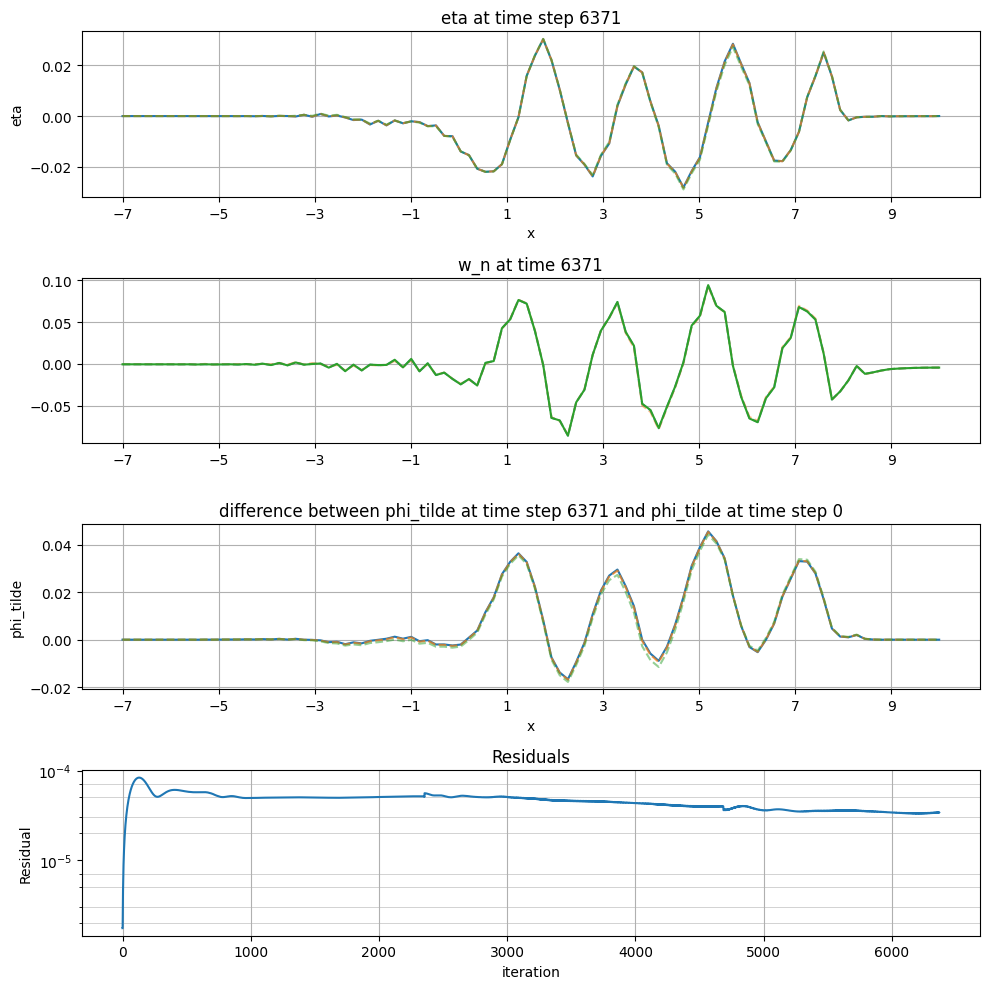

In [444]:
def define_arrays():
    import numpy as np
    eta = np.load("./arrays/eta.npy")
    phi = np.load("./arrays/phiTilde.npy")
    fs_xs = np.load("./arrays/coordsFS.npy")
    wn = np.load("./arrays/ws.npy")

    # sorter informationen i alle numpy arrays
    idx = np.argsort(fs_xs, axis=1)
    eta = np.take_along_axis(eta, idx, axis=1)
    phi = np.take_along_axis(phi, idx, axis=1)
    fs_xs = np.take_along_axis(fs_xs, idx, axis=1)
    wn = np.take_along_axis(wn, idx,axis = 1)

    residuals = np.load("./arrays/residuals.npy")
    residuals, time_step = residuals[:,0], residuals[:,1]

    eta -= eta[0,0]

    phi[:] -= phi[0]
    return eta, phi, fs_xs, wn, idx, residuals, time_step
eta, phi, fs_xs, wn, idx, residuals, time_step = define_arrays()
def doplots(time=-1):
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.ticker import LogLocator
    fig, ax = plt.subplots(4, 1, figsize = (10,10))
    if time == -1:
        try:
            time = np.where(time_step == 0)[0][0] - 1
        except:
            time = len(time_step) - 1

    ax[0].plot(fs_xs[time][:], eta[time][:])
    if time - 50 > 0:
        ax[0].plot(fs_xs[time-10][:], eta[time-10][:] , alpha = 0.7, linestyle = "--")
        ax[0].plot(fs_xs[time-50][:], eta[time-50][:] , alpha = 0.5, linestyle = "--")

    ax[0].set_title(f"eta at time step {time}" )
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("eta")
    ax[0].set_xticks(np.arange(int(fs_xs[0].min()), fs_xs[0].max()+1, 2))
    ax[0].grid()

    if time - 50 > 0:
        ax[1].plot(fs_xs[time-10][:], wn[time-10][:], alpha = 0.7, linestyle = "--")
        ax[1].plot(fs_xs[time-50][:], wn[time-50][:], alpha = 0.5, linestyle = "--")
    ax[1].plot(fs_xs[time][:], wn[time][:])
    ax[1].set_title(f"w_n at time {time}")
    ax[1].set_xticks(np.arange(int(fs_xs[0].min()), fs_xs[0].max()+1, 2))
    ax[1].grid()

    ax[2].plot(fs_xs[0], phi[time])
    if time - 50 > 0:
        ax[2].plot(fs_xs[0], phi[time-10], alpha = 0.7, linestyle = "--")
        ax[2].plot(fs_xs[0], phi[time-50], alpha = 0.5, linestyle = "--")
    ax[2].set_title(f"difference between phi_tilde at time step {time} and phi_tilde at time step 0" )
    # ax[2].set_title(f"phi_tilde flattened at time step {time}")
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("phi_tilde")
    ax[2].set_xticks(np.arange(int(fs_xs[0].min()), fs_xs[0].max()+1, 2))
    ax[2].grid()
    # ax[2].set_xlim(-3,0)


    if time >0:
        residuals[0] = residuals[1]
    ax[3].plot(residuals[:time])
    ax[3].set_title("Residuals")
    ax[3].set_xlabel("iteration")
    ax[3].set_ylabel("Residual")
    ax[3].set_yscale("log")
    ax[3].yaxis.set_major_locator(LogLocator(base=10.0))
    ax[3].yaxis.set_minor_locator(LogLocator(base=10.0, subs=[10,7,5,3,2,1]))
    ax[3].grid(which='major', axis='y', linewidth=0.8)
    ax[3].grid(which='minor', axis='y', linewidth=0.4)
    ax[3].grid()
    plt.tight_layout()
    plt.show()
    return None
doplots()

# Den her er for at stoppe

In [443]:
eta, phi, fs_xs, wn, idx, residuals, time_step = define_arrays()
def animation(arr, frame_step, stop_frame = -1):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.animation import FuncAnimation
    from matplotlib import rc
    from IPython.display import HTML

    if stop_frame == -1:
        try:
            time = np.where(time_step == 0)[0][0] - 1
        except:
            time = len(time_step) - 1
    else:
        time = stop_frame
    
    non0array = arr[:time]

    # Tell Jupyter to render animations as JS
    rc('animation', html='jshtml')

    # 1. Prepare the figure and axis
    fig, ax = plt.subplots()
    (line,) = ax.plot([], [])

    ax.set_xlabel("x")
    ax.set_ylabel("eta")
    ax.set_xticks(np.arange(int(fs_xs[0].min()), fs_xs[0].max()+1, 2))
    ax.grid()
    ymin = np.min(non0array)
    ymax = np.max(non0array)
    pad = 0.05 * (ymax - ymin)
    ax.set_ylim(ymin - pad, ymax + pad)

    def init():
        line.set_data([], [])
        return (line,)

    def update(time):
        time *= frame_step
        x = fs_xs[time]
        y = non0array[time]
        time += 1
        line.set_data(x, y)
        return (line,)

    anim = FuncAnimation(
        fig,
        update,
        init_func=init,
        frames=time//frame_step,
        interval=50,
        blit=True,
    )
    plt.close(fig)
    return HTML(anim.to_jshtml())
animation(eta,50)

# Den her er for at stoppe 